# <div align='center'>第6章 判别分析与聚类分析</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
      <br> 
       6.1 判别分析<br><br>
       6.2 聚类分析<br><br>
     <font>
  </div>

### sklearn.discriminant_analysis.LinearDiscriminantAnalysis
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[3, 3.5]]))

[2]


### sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
### 二次判别分析
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

In [4]:
import numpy as np


def dataset_fixed_cov():
    """Generate 2 Gaussians samples with the same covariance matrix"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -0.23], [0.83, 0.23]])
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    """Generate 2 Gaussians samples with different covariance matrices"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [5]:
from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
        plt.ylabel("Data with\n fixed covariance")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")
    elif fig_index == 3:
        plt.ylabel("Data with\n varying covariances")

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099"
    )  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

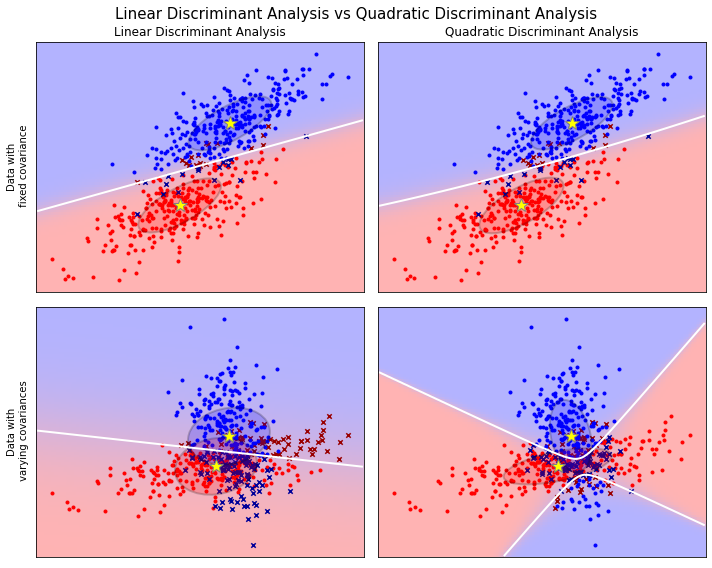

In [6]:
plt.figure(figsize=(10, 8), facecolor="white")
plt.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.98,
    fontsize=15,
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis("tight")

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

##### 判别分析举例

In [7]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sheet_name = '判别分析'
df = pd.read_excel(r'.\data.xlsx',sheet_name= sheet_name, header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.array(df_list)
# print(data)
X = data[:14,2:] # np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# print(X)
print(X)
# y = np.array(df['类别'][:14]).flatten().astype('float')# data[:14,1:2].tolist() # np.array([1, 1, 1, 2, 2, 2])
y = np.array(data[:14,1:2].astype('float')).flatten() # 转成一维数组

print(y)
clf1 = LinearDiscriminantAnalysis()
clf1.fit(X, y)
clf1.predict(data[14:,2:])



['编号' '类别' 'Cu' 'Ag' 'Bi']
[[380 0.08 8.9]
 [800 0.17 10.1]
 [3550 0.14 10.0]
 [224 0.14 6.0]
 [3500 0.7 6.0]
 [500 1.7 20.0]
 [500 0.5 3.0]
 [177 0.95 115.0]
 [143 0.64 115.0]
 [215 0.55 12.5]
 [92 0.3 10.9]
 [87 0.25 10.0]
 [1000 0.2 10.0]
 [600 0.5 30.0]]
[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.]


array([1.])

--------------------------决策树判别-----------------------
[2.]


[Text(0.4, 0.9, 'X[0] <= 219.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.7, 'X[2] <= 25.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.4, 0.5, 'X[0] <= 900.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.3, 'X[0] <= 2250.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

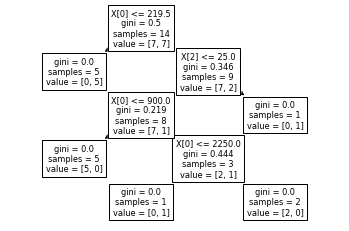

In [8]:
print('--------------------------决策树判别-----------------------')
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)
result = clf2.predict(data[14:,2:])
print(result)
tree.plot_tree(clf2)


In [9]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sheet_name = 'Sheet2'
df = pd.read_excel(r'.\data.xlsx',sheet_name= sheet_name, header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
X = data[:23,2:] # np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# print(X)

# y = np.array(df['类别'][:14]).flatten().astype('float')# data[:14,1:2].tolist() # np.array([1, 1, 1, 2, 2, 2])
y = np.array(data[:23,1:2].astype('float')).flatten() # 转成一维数组

print(y)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
clf.predict(data[23:,2:])


['编号' '类别' 'SiO2' 'CaO' 'MgO' 'Al2O3' 'K2O' 'Na2O' 'Cu' 'Mo' 'Ag']
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


C:\Users\xyt556\PycharmProjects\big_data\envi\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\xyt556\PycharmProjects\big_data\envi\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([2., 2., 2.])

--------------------------决策树判别-----------------------


C:\Users\xyt556\PycharmProjects\big_data\envi\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\xyt556\PycharmProjects\big_data\envi\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[Text(0.5, 0.75, 'X[7] <= 0.032\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

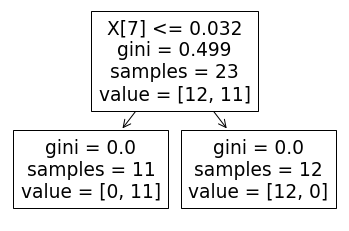

In [10]:
print('--------------------------决策树判别-----------------------')
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)
clf2.predict(data[23:,2:])
tree.plot_tree(clf2)

------------

## 6.1 判别分析


### 6.1.1 距离判别


 #### 例1：
 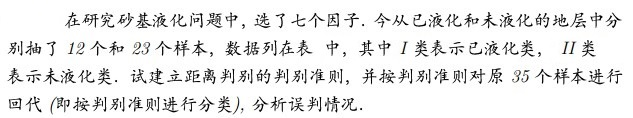
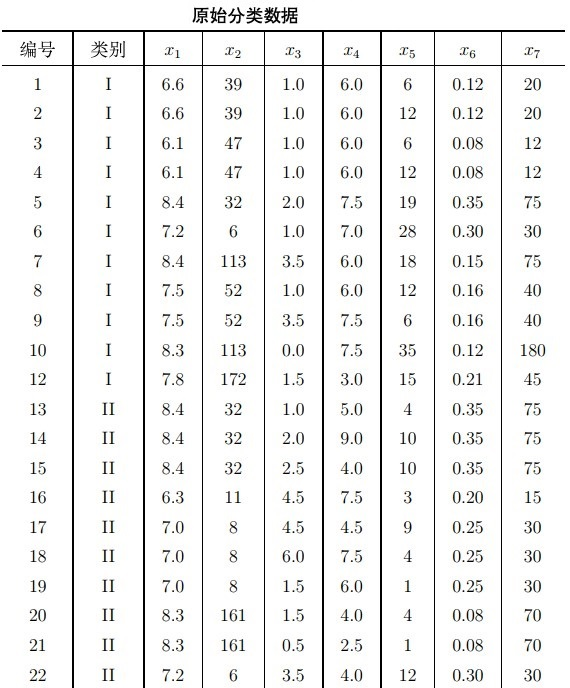
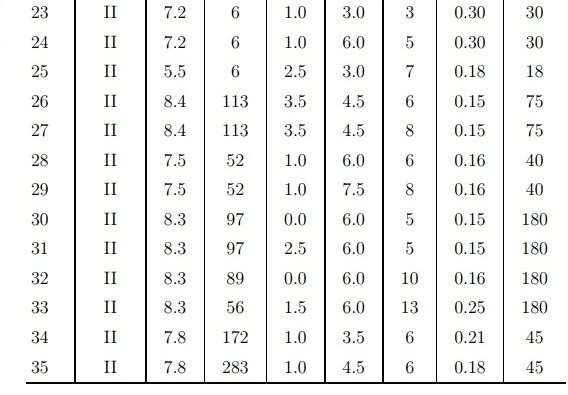

In [11]:
### 导入所需的软件包
%reset -f
import numpy as np
import pandas as pd
import scipy.stats as st

In [12]:
'''
使用马氏距离进行二分类判别分析，假设方差不相等的情况下。

'''
###样本1：已液化砂层，12个样本
# classX1 = np.array([[6.60,  6.60,  6.10,  6.10,  8.40,  7.2,   8.40,  7.50, 7.50,  8.30,  7.80,  7.80],
#                     [39.00, 39.00, 47.00, 47.00, 32.00,  6.0, 113.00, 52.00,52.00,113.00,172.00,172.00],
#                     [1.00,  1.00,  1.00,  1.00,  2.00,  1.0,   3.50,  1.00,3.50,  0.00,  1.00,  1.50],
#                     [6.00,  6.00,  6.00,  6.00,  7.50,  7.0,   6.00,  6.00,7.50,  7.50,  3.50,  3.00],
#                     [6.00, 12.00,  6.00, 12.00, 19.00, 28.0,  18.00, 12.00, 6.00, 35.00, 14.00, 15.00],
#                     [.12,  0.12,  0.08,  0.08,  0.35,  0.3,   0.15,  0.16, 0.16,  0.12,  0.21,  0.21],
#                     [20.00, 20.00, 12.00, 12.00, 75.00, 30.0,  75.00, 40.00,40.00,180.00, 45.00, 45.00]])
# ###样本2:未液化砂层，23个样本
# classX2 = np.array([[8.40,  8.40,  8.40,  6.3, 7.00,  7.00,  7.00,  8.30,8.30,   7.2,   7.2,  7.2, 5.50,
#                      8.40,  8.40,  7.50,7.50,  8.30,  8.30, 8.30, 8.30,  7.80,  7.80],
#                     [32.0 ,32.00, 32.00, 11.0, 8.00,  8.00,  8.00, 161.00, 161.0, 6.0, 6.0,  6.0, 6.00,
#                      113.00,113.00,  52.00, 52.00, 97.00, 97.00,89.00,56.00,172.00,283.00],
#                     [1.00,  2.00,  2.50,  4.5, 4.50,  6.00,  1.50,  1.50, 0.50,   3.5,   1.0,  1.0, 2.50, 
#                      3.50,  3.50,  1.00,1.00,  0.00,  2.50, 0.00, 1.50,  1.00,  1.00],
#                     [5.00,  9.00,  4.00,  7.5, 4.50,  7.50,  6.00,  4.00, 2.50,   4.0,   3.0,  6.0, 3.00, 
#                      4.50,  4.50,  6.00,7.50,  6.00,  6.00, 6.00, 6.00,  3.50,  4.50],
#                     [4.00, 10.00, 10.00,  3.0, 9.00,  4.00,  1.00,  4.00, 1.00,  12.0,   3.0,  5.0, 7.00, 
#                      6.00,  8.00,  6.00,8.00,  5.00,  5.00,10.00,13.00,  6.00,  6.00],
#                     [0.35,  0.35,  0.35,  0.2, 0.25,  0.25,  0.25,  0.08, 0.08,  0.30,   0.3,  0.3, 0.18,
#                      0.15,  0.15,  0.16, 0.16,  0.15,  0.15, 0.16, 0.25,  0.21,  0.18],
#                     [75.00, 75.00, 75.00,  15.0, 30.00, 30.00, 30.00, 70.00, 70.00,  30.0,  30.0,  30.0, 
#                      18.00, 75.00, 75.00, 40.00, 40.00,180.00,180.00,180.00,180.00, 45.00, 45.00]])
sheet_name = '判别分析'
df = pd.read_excel(r'.\data.xlsx',sheet_name= sheet_name, header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
print(data.shape)
##  方法一
# classX1 = np.array(data[0:12,2:]).astype('float').T
# classX2 = np.array(data[12:23,2:]).astype('float').T
# 方法二 ----------------------------------------------------------
df1 = df.loc[df['类别'] == 1] #筛选出列值等于标量的行，用==
df2 = df.loc[df['类别'] == 2]
print(df1)
print(df2)
classX1 = np.array(df1.values[:,2:]).astype('float').T
classX2 = np.array(df2.values[:,2:]).astype('float').T
# 方法二 ----------------------------------------------------------
print(classX1.shape)
print(classX2.shape)

###样本1和2的样本方差/协方差矩阵
#按照行向量计算协方差矩阵
S1 = np.cov(classX1)
S2 = np.cov(classX2)
l1= classX1.shape[1]
l2= classX2.shape[1]
###样本1和2的均值
mu1 = np.mean(classX1,axis=1)
mu2 = np.mean(classX2,axis=1)

###样本1和2各自以及和对方之间的马氏距离计算
d1_2 = np.diag(((classX1 - np.matrix(mu2).T).T)@np.linalg.inv(S2)@
               (classX1 - np.matrix(mu2).T))
#样本1到1之间的马氏距离
d1_1 = np.diag(((classX1 - np.matrix(mu1).T).T)@np.linalg.inv(S1)@
               (classX1 - np.matrix(mu1).T))
#样本2到2之间的马氏距离
d2_2 = np.diag(((classX2 - np.matrix(mu2).T).T)@np.linalg.inv(S2)@
               (classX2 - np.matrix(mu2).T))
#样本2到1之间的马氏距离
d2_1 = np.diag(((classX2 - np.matrix(mu1).T).T)@np.linalg.inv(S1)@
               (classX2 - np.matrix(mu1).T))

###根据判别函数的定义如果两两相比，距离小的那个类是数据所属类
#根据判别函数，样本1的数据判别为类型1的结果为
result1 = d1_1<d1_2
result1_1 = np.zeros(l1,dtype=int)
result1_1[np.where(result1)] = 1
result1_1[np.where(result1!=True)] = 2
print('样本1判别为类型1的结果为：',result1_1)#结果显示第9个样本判别错误
#根据判别函数，样本2的数据判别为类型1的结果为
result2 = d2_2<d2_1 
result2_1 = np.zeros(l2,dtype=int)
result2_1[np.where(result2)] = 2
result2_1[np.where(result2!=True)] = 1
#结果显示样本2的类型判别全部正确
print('样本2判别为类型2的结果为：',result2_1)

['编号' '类别' 'Cu' 'Ag' 'Bi']
(15, 5)
   编号 类别    Cu    Ag    Bi
0   0  1   380  0.08   8.9
1   1  1   800  0.17  10.1
2   2  1  3550  0.14  10.0
3   3  1   224  0.14   6.0
4   4  1  3500  0.70   6.0
5   5  1   500  1.70  20.0
6   6  1   500  0.50   3.0
    编号 类别    Cu    Ag     Bi
7    7  2   177  0.95  115.0
8    8  2   143  0.64  115.0
9    9  2   215  0.55   12.5
10  10  2    92  0.30   10.9
11  11  2    87  0.25   10.0
12  12  2  1000  0.20   10.0
13  13  2   600  0.50   30.0
(3, 7)
(3, 7)
样本1判别为类型1的结果为： [1 1 1 1 1 1 2]
样本2判别为类型2的结果为： [2 2 1 1 1 1 2]


In [13]:
'''
  距离判别在多分类任务的应用。
  机器学习的经典数据集鸢尾花，根据花萼和花瓣的长度与宽度四种属性，对鸢尾花分类。
  共有3类鸢尾花。
'''
import pandas as pd
import numpy as np
iris_fromfile = pd.read_csv('./data/iris.csv', skiprows=1,
                        names=['Sepal.Length','Sepal.Width','Petal.Length',
                               'Petal.Width','Species'])

###生成类型因子，1表示setosa；2表示versicolor；3表示virginica
iris_factors = np.repeat([1,2,3],[50,50,50]) #1、2、3各重复50次，对应相应鸢尾花的类型
irisArray = np.array(iris_fromfile) #转换成数组类型，便于处理
iris = np.array(irisArray[:,0:-1],dtype=float) #取出前4列，排除第5列鸢尾花类名
iris_fromfile

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
'''
马氏距离计算的函数
'''
def mahalanobis(data,mu,var):
    dist = np.diag(((data - np.matrix(mu).T).T)@
                   np.linalg.inv(var)@(data - np.matrix(mu).T))
    return dist   

In [15]:
###计算iris鸢尾花数据集的马氏距离
m = np.mean(iris,axis=0)#向量均值，即每个观测变量的均值
cov1 = np.cov(iris.T) #观测变量之间的协方差
result = mahalanobis(iris.T,m,cov1) 
##显示前20个数据，总共是150个
result[0:20,]

array([2.13446792, 2.84911869, 2.08133866, 2.45238163, 2.46215453,
       3.88341767, 2.86210813, 1.83330032, 3.38407311, 2.37521789,
       3.28310687, 2.77479751, 2.61329752, 3.60343235, 8.73751836,
       9.71278989, 5.76058768, 2.32138944, 4.49968993, 3.43886583])

In [16]:
###多分类距离判别，距离最小的因子即判别为数据的类型。
def distinguishDistance(train,factor,test=None,vequal=False):
    #如果没有另外指定测试数据，就直接使用训练数据作为测试数据
    if test is None:
        test = train
    
    #类型个数
    f_n = len(np.unique(factor))
    
    #train.shape[1]：属性数；生成的形状是(类型数，属性数)
    mu = np.zeros((f_n,train.shape[1]))
    
    #列合并数据和类型因子
    trainWithFactors = np.c_[train,factor]
    #求每种类型的鸢尾花每个属性的均值（各自）
    for i in np.arange(0,f_n):
        j = i+1
        #特别要注意axis参数，0：表示纵向，即每列的均值；1：表示横向，求每行的均值
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    #数据条数，如果没有输入测试数据，回代训练数据
    rows_test = test.shape[0]
    #生成判别类型的保存变量
    ftype = np.zeros(rows_test)
    
    #形状：(类型数,测试数据条数)，此处是(3,150)
    #保存所有测试数据与各类型之间的距离
    D = np.zeros((f_n,rows_test))
    
    #方差相等的情况
    if vequal==True:
        #计算全部数据的协方差（即不分类型），注意要将数据转置成行向量
        cov_train = np.cov(train.T)
        #计算数据与各类型之间的马氏距离，本例中该结果的shape应为(3,150)
        for i in np.arange(0,f_n):
            D[i,:] = mahalanobis(test.T,mu[i,],cov_train)
    else:
        for i in np.arange(0,f_n):
            j = i+1
            #按照不同类别，计算各自类别数据的协方差
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            D[i,:] = mahalanobis(test.T,mu[i,],covByFactor)
    
    #比如本例mahalanobis函数返回的是一个(3,150)的数组
    for j in np.arange(0,rows_test):
        dmin=float('Inf')
        for i in np.arange(0,f_n):
            if D[i,j] < dmin:
                dmin = D[i,j]
                ftype[j] = i+1
    return ftype                

In [17]:
###训练数据回代，然后对比，验证准确率。假设协方差相等的情况下误判较多
f = distinguishDistance(iris,iris_factors,vequal=True)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('假设方差相同的情况下，回代分类准确率为:',np.round(accuracy,2),'\n误判数据：',missort)

###训练数据进行回代，然后进行对比，验证准确率。假设协方差不相同的情况下：
#判别的准确率高出不少。
f = distinguishDistance(iris,iris_factors)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('\n假设方差不相同的情况下，回代分类准确率为:',accuracy,'\n误判数据：',missort)

假设方差相同的情况下，回代分类准确率为: 0.87 
误判数据： [ 41  51  56  61  66  70  77  84  85 103 106 107 108 119 122 129 130 133
 134 146]

假设方差不相同的情况下，回代分类准确率为: 0.98 
误判数据： [70 72 83]


In [18]:
np.where(f != iris_factors)

(array([70, 72, 83], dtype=int64),)

### 6.1.2 贝叶斯判别
#### (1) 两个总体二分类的贝叶斯判别


In [19]:
'''
两总体的贝叶斯判别分析函数
'''
#rate = p2/p1,即第2个样本的数量除以第1个样本的数量
def discrimBayes(train1,train2,rate=1,test=None,vequal=False):
    #如果测试数据为空，将训练数据回代
    if test==None:
        test = np.vstack((train1,train2))
    #数据条数
    rows_test = test.shape[0]
    #分类结果保存
    ftype = np.zeros(rows_test)
    #第1、2个样本的均值
    mu1 = np.mean(train1,axis=0)
    mu2 = np.mean(train2,axis=0)
    #如果协方差矩阵相等
    if vequal == True:
        cov_train =  np.cov(np.vstack((train1,train2)).T)
        #这里beta的公式乘以2是因为了和距离函数中W(x)中的1/2抵消
        beta = 2*np.log(rate)
        #马氏距离计算出来之后无需乘以1/2，因为前面的beta已经乘以2，
        #二者在一个量级，不影响大小的比较
        d = mahalanobis(test.T,mu2,cov_train) - mahalanobis(test.T,mu1,cov_train)
    else:
        cov1 = np.cov(train1.T)
        cov2 = np.cov(train2.T)
        
        #计算两个样本数据的协方差行列式
        #在线性代数里，行列式的几何意义表示的二维矩阵的张成面积，三维就是张成体积
        #因此会使用协方差的行列式之比，能很好比较二者大小。
        #注意协方差的比值没有乘以1/2
        beta = 2*np.log(rate)+np.log(np.linalg.det(cov1)/np.linalg.det(cov2))
        d = mahalanobis(test.T,mu2,cov2) - mahalanobis(test.T,mu1,cov1)
    #判别类型
    for i in np.arange(0,rows_test):
        if d[i] > beta:
            ftype[i] = 1
        else:
            ftype[i] = 2
    return ftype

In [20]:
'''
使用例1：砂基液化的数据
'''
classX1 = np.array([[6.60,  6.60,  6.10,  6.10,  8.40,  7.2,   8.40,  7.50, 7.50,  8.30,  7.80,  7.80],
                    [39.00, 39.00, 47.00, 47.00, 32.00,  6.0, 113.00, 52.00,52.00,113.00,172.00,172.00],
                    [1.00,  1.00,  1.00,  1.00,  2.00,  1.0,   3.50,  1.00,3.50,  0.00,  1.00,  1.50],
                    [6.00,  6.00,  6.00,  6.00,  7.50,  7.0,   6.00,  6.00,7.50,  7.50,  3.50,  3.00],
                    [6.00, 12.00,  6.00, 12.00, 19.00, 28.0,  18.00, 12.00, 6.00, 35.00, 14.00, 15.00],
                    [.12,  0.12,  0.08,  0.08,  0.35,  0.3,   0.15,  0.16, 0.16,  0.12,  0.21,  0.21],
                    [20.00, 20.00, 12.00, 12.00, 75.00, 30.0,  75.00, 40.00,40.00,180.00, 45.00, 45.00]])
###样本2:未液化砂层，23个样本
classX2 = np.array([[8.40,  8.40,  8.40,  6.3, 7.00,  7.00,  7.00,  8.30,8.30,   7.2,   7.2,  7.2, 5.50,
                     8.40,  8.40,  7.50,7.50,  8.30,  8.30, 8.30, 8.30,  7.80,  7.80],
                    [32.0 ,32.00, 32.00, 11.0, 8.00,  8.00,  8.00, 161.00, 161.0, 6.0, 6.0,  6.0, 6.00,
                     113.00,113.00,  52.00, 52.00, 97.00, 97.00,89.00,56.00,172.00,283.00],
                    [1.00,  2.00,  2.50,  4.5, 4.50,  6.00,  1.50,  1.50, 0.50,   3.5,   1.0,  1.0, 2.50, 
                     3.50,  3.50,  1.00,1.00,  0.00,  2.50, 0.00, 1.50,  1.00,  1.00],
                    [5.00,  9.00,  4.00,  7.5, 4.50,  7.50,  6.00,  4.00, 2.50,   4.0,   3.0,  6.0, 3.00, 
                     4.50,  4.50,  6.00,7.50,  6.00,  6.00, 6.00, 6.00,  3.50,  4.50],
                    [4.00, 10.00, 10.00,  3.0, 9.00,  4.00,  1.00,  4.00, 1.00,  12.0,   3.0,  5.0, 7.00, 
                     6.00,  8.00,  6.00,8.00,  5.00,  5.00,10.00,13.00,  6.00,  6.00],
                    [0.35,  0.35,  0.35,  0.2, 0.25,  0.25,  0.25,  0.08, 0.08,  0.30,   0.3,  0.3, 0.18,
                     0.15,  0.15,  0.16, 0.16,  0.15,  0.15, 0.16, 0.25,  0.21,  0.18],
                    [75.00, 75.00, 75.00,  15.0, 30.00, 30.00, 30.00, 70.00, 70.00,  30.0,  30.0,  30.0, 
                     18.00, 75.00, 75.00, 40.00, 40.00,180.00,180.00,180.00,180.00, 45.00, 45.00]])
train1 = classX1.T
train2 = classX2.T
rows1 = train1.shape[0]
rows2 = train2.shape[0]
factors = np.repeat([1,2],[12,23])

#方差不相等的情况下判别全对。假设方差相等时，判别准确率差强人意
f = discrimBayes(train1,train2,rows2/rows1,vequal=False)
accuracy = len(np.where(factors == f)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差不相等)：',np.round(accuracy,2))

f1 = discrimBayes(train1,train2,rows2/rows1,vequal=True)
accuracy1 = len(np.where(factors == f1)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差相等)：',np.round(accuracy1,2))

贝叶斯判别的准确率为(协方差不相等)： 1.0
贝叶斯判别的准确率为(协方差相等)： 0.83


#### 例2：
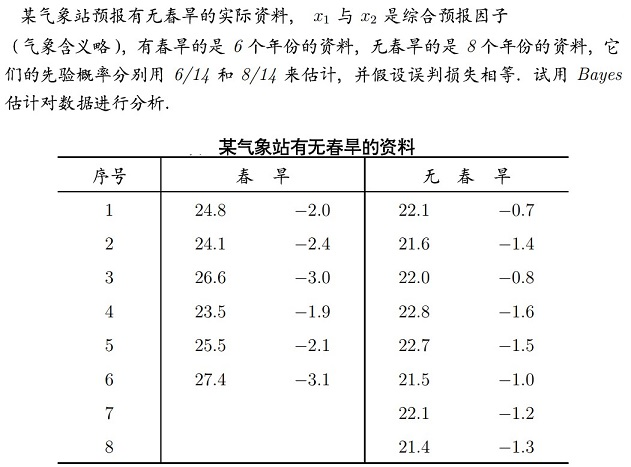

In [21]:
###本例中，协方差不相同时，判别全对；相同时，第4个数据误判
TrnX1=np.array([[24.8, 24.1, 26.6, 23.5, 25.5, 27.4],
               [-2.0, -2.4, -3.0, -1.9, -2.1, -3.1]]).T
  
TrnX2=np.array([[22.1, 21.6, 22.0, 22.8, 22.7, 21.5, 22.1, 21.4],
               [-0.7, -1.4, -0.8, -1.6, -1.5, -1.0, -1.2, -1.3]]).T
rows1 = TrnX1.shape[0]
rows2 = TrnX2.shape[0]
factors = np.repeat([1,2],[rows1,rows2])

###假定协方差相同
f = discrimBayes(TrnX1,TrnX2,rows2/rows1,vequal=True)
accuracy = len(np.where(factors == f)[0])/len(factors)
print('贝叶斯判别的准确率为(协方差相同)：',np.round(accuracy,2))
print('判别类型：',f)

###假定协方差不同
f1 = discrimBayes(TrnX1,TrnX2,rows2/rows1,vequal=False)
accuracy1 = len(np.where(factors == f1)[0])/len(factors)
print('\n贝叶斯判别的准确率为(协方差不同)：',np.round(accuracy1,2))
print('判别类型：',f1)

贝叶斯判别的准确率为(协方差相同)： 0.93
判别类型： [1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]

贝叶斯判别的准确率为(协方差不同)： 1.0
判别类型： [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]


--------

 #### (2) 多分类问题的贝叶斯判别



In [22]:
'''
贝叶斯判别在多分类中的应用。
'''
def distinguishBayes(train,factor,p=None,test=None,vequal=False):
    #注意train是列向量
    #如果test为空，则直接使用训练数据
    if test is None:
        test = train
    
    if p == None:
        p=np.repeat(1,len(np.unique(factor)))
    
    #类型数
    f_n = len(np.unique(factor))
    #用来保存均值的多维数组，(类型数,样本数据数)，本例中是(3,150)
    mu = np.zeros((f_n,train.shape[1]))
    #将训练数据和类型因子关联起来
    trainWithFactors = np.c_[train,factor]
    
    #获取每种类型的数据各属性的均值
    #本例中有3个种类，4个属性
    #每行就是某个种类的4个属性的均值
    for i in np.arange(0,f_n):
        j = i+1
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    
    #注意传入函数的训练数据是列向量，rows_test是训练数据的条数（也是行数）
    rows_test = test.shape[0]
    #保存每条数据的类型
    ftype = np.zeros(rows_test)
    #距离：每条数据和每个类型距离都要保存，本例D.shape=(3,150)
    D = np.zeros((f_n,rows_test))
    
    #协方差矩阵相同
    if vequal==True:
        cov_train = np.cov(train.T)
        for i in np.arange(0,f_n):
            d = mahalanobis(test.T,mu[i,],cov_train)
            
            ###判别函数
            
            D[i,:] = d - 2*np.log(p[i])
    else:##协方差矩阵不相同
        #每次循环计算训练数据(150条)和1个类型的距离，循环次数等于类型个数
        for i in np.arange(0,f_n):
            j = i+1            
            ###分别计算3个类型训练数据的协方差矩阵
            #注意要将矩阵转置成行向量，才能计算4个属性的协方差矩阵
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            #计算数据和某个类型的距离
            d = mahalanobis(test.T,mu[i,],covByFactor)    
            D[i,:] = d - 2*np.log(p[i]) - np.log(np.linalg.det(covByFactor))
    
    ###根据判别准则进行判别
    
    for j in np.arange(0,rows_test):
        dmin=float('Inf')
        #每列迭代比较，最小距离所在行索引+1即该条数据的判别类型
        for i in np.arange(0,f_n):
            if D[i,j] < dmin:
                dmin = D[i,j]
                ftype[j] = i+1
    return ftype                

In [23]:
###使用鸢尾花数据
f = distinguishBayes(iris,iris_factors)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('贝叶斯判别准确率(假设样本方差不同):',np.round(accuracy,4),'\n误判数据：',missort)

贝叶斯判别准确率(假设样本方差不同): 0.9667 
误判数据： [68 70 72 77 83]


### 6.1.3 Fisher判别


In [24]:
'''
Fisher判别
二分类
'''
def discrimFisher(train1,train2,test=None):
    if test==None:
        test = np.vstack((train1,train2))
    nrowsTest = test.shape[0]
    nrow1 = train1.shape[0]
    nrow2 = train2.shape[0]
    ftype = np.zeros(nrowsTest)   
    
    #第1、2样本数据的均值
    mu1 = np.mean(train1,axis=0)
    mu2 = np.mean(train2,axis=0)
    
    ###S是2个样本协方差矩阵之和，作为类内偏差之和
    S = (nrow1-1)*np.cov(train1.T) + (nrow2-1)*np.cov(train2.T)
    #下述例子是使用方差向量作为S统计量的值
    #S = (nrow1-1)*st.tvar(train1) + (nrow2-1)*st.tvar(train2)
    
    
    ###2个样本数据均值的调和均值
    mu = (nrow1/(nrow1+nrow2))*mu1 + (nrow2/(nrow1+nrow2))*mu2
    
    
    wx=np.array(mu2-mu1)@np.linalg.inv(S)@(test - mu).T
    ###下述代码是使用方差向量作为S的值计算判别函数。
    #判别精度都为94%，但是其中错判的数据有一个不同，为[7,28]
    #wx=np.array(mu2-mu1)@np.diag(S**(-1))@(test - mu).T
    
    ###根据判别准则计算类别
    for i in np.arange(0,nrowsTest):
        if wx[i]<=0:
            ftype[i] = 1
        else:
            ftype[i] = 2
    return ftype

In [25]:
#使用砂基液化的数据
train1 = classX1.T
train2 = classX2.T
f = discrimFisher(train1,train2)
factors = np.repeat([1,2],[12,23])
missort = np.where(f!=factors)[0]
accuracy = len(np.where(factors == f)[0])/len(factors)
print('Fisher判别的准确率为：',np.round(accuracy,2),'\n误判数据：',missort)

Fisher判别的准确率为： 0.94 
误判数据： [27 28]


In [26]:
###Numpy的广播机制
a=np.arange(1,13).reshape(3,4)
b=np.array([1,2,3,4])
c=np.array([[1,2,3]]).T
print('a:\n',a)
print('\nb:\n',b)
print('\nc:\n',c)
print('\na-b:\n',a-b)
print('\na-c:\n',a-c)

a:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

b:
 [1 2 3 4]

c:
 [[1]
 [2]
 [3]]

a-b:
 [[0 0 0 0]
 [4 4 4 4]
 [8 8 8 8]]

a-c:
 [[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [27]:
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9,10])
np.where(a>3)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),)

### 6.1.4 线性判别与二次判别分析
英语：Linear & Quadratic Discriminant Analysis,LDA&QDA


In [28]:
'''
LDA&QDA，线性&二次判别分析函数
'''
def lqda(train,factor,test=None,linear=True):
    #注意train是列向量
    #如果test为空，则直接使用训练数据
    if test is None:
        test = train
    
    #类型数
    f_n = len(np.unique(factor))
    #用来保存均值的多位数组，(类型数,样本数据数)，本例中是(3,150)
    mu = np.zeros((f_n,train.shape[1]))
    #将训练数据和类型因子关联起来
    trainWithFactors = np.c_[train,factor]
    
    ###训练集的样本量，此处为150
    n=train.shape[0]
    ###计算训练数据的先验概率
    pi=np.zeros((f_n,))
    i=0
    for f in np.unique(factor):
        #取出每个类型数据的条数
        ni=np.sum(trainWithFactors[:,4]==f)
        #用每类型数据的条数/总数据量，即为先验概率
        pi[i]=ni/n
        i=i+1
                  
    
    #获取每种类型的数据各属性的均值
    
    for i in np.arange(0,f_n):
        j = i+1
        mu[i,] = np.mean(train[np.where(trainWithFactors[:,4]==j)],axis=0)
    
    #注意传入函数的训练与测试数据是列向量，rows_test是测试数据的条数（也是行数）    
    rows_test = test.shape[0]
    #保存每条数据的类型
    ftype = np.zeros(rows_test)
    #Delta判别函数的值：每条数据和每个类型Delta都要保存，本例D.shape=(3,150)
    #Delta最大的那个行索引即判定类。
    D = np.zeros((f_n,rows_test))
    
    #lda,线性判别
    if linear==True:
        ###注意计算协方差矩阵使用训练数据
        cov_train = np.cov(train.T)
        for i in np.arange(0,f_n):
            ###判别函数，计算测试数据的判别函数，注意一定要将mu[i,]转换成矩阵
            
            D[i,:] = test@np.linalg.inv(cov_train)@mu[i,] \
                     - 1/2*mu[i,]@np.linalg.inv(cov_train)@mu[i,] \
                     + np.log(pi[i])
            
    ##qda,二次判别使用各自类型的协方差矩阵进行参数估计        
    else:
        #每次循环计算训练数据(150条)和1个类型的距离，循环次数等于类型个数
        for i in np.arange(0,f_n):
            j = i+1            
            ###分别计算每个类型训练数据的协方差矩阵
            #注意要将矩阵转置成行向量，才能计算每个属性的协方差矩阵
            covByFactor = np.cov(train[np.where(trainWithFactors[:,4]==j)].T)
            
            D[i,:]=-(1/2)*mahalanobis(test.T,mu[i,],covByFactor) \
                   -(1/2)*np.log(np.linalg.det(covByFactor)) \
                   +np.log(pi[i]) 
                        
    '''
    根据判别准则进行判别。    
    '''
    for j in np.arange(0,rows_test):
        dmax=float('-Inf')
        #每列迭代比较，最小距离所在列索引+1即该条数据的判别类型
        for i in np.arange(0,f_n):
            if D[i,j] > dmax:
                dmax = D[i,j]
                ftype[j] = i+1
    return ftype                

In [29]:
np.arange(1,4)

array([1, 2, 3])

In [30]:
'''
使用lqda函数，linear设为False，即二次判别分析。
准确率较高，和R语言的qda函数计算的结果一致。
'''
f = lqda(iris,iris_factors,linear=False)
missort = np.where(f != iris_factors)[0]
accuracy =1 - len(missort)/len(iris_factors)
print('二次判别分析的准确率:',np.round(accuracy,4),'\n误判数据：',missort)

二次判别分析的准确率: 0.98 
误判数据： [ 70  83 133]


In [31]:
'''
设为lqda函数的参数linear=True即为线性判别分析。
判别结果与二次判别相同，说明判别边界为线性。
'''
f1 = lqda(iris,iris_factors,linear=True)
missort1 = np.where(f != iris_factors)[0]
accuracy1 =1 - len(missort1)/len(iris_factors)
print('线性判别准确率:',np.round(accuracy1,4),'\n误判数据：',missort1)

线性判别准确率: 0.98 
误判数据： [ 70  83 133]


In [32]:
###numpy的array与matrix数据不同计算方式
#数组类型
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[7,8,9],[11,12,13]])
#矩阵类型
c=np.matrix([[1,2,3],[4,5,6]])
d=np.matrix([[7,8,9],[11,12,13]]).T
#广播机制
e=np.array([9,10,11])
f=np.array([[10],[11]])
print(a*b,'\n')
print(c*d,'\n')
print(a*e,'\n')
print(a*f,'\n')
print(a*d)

[[ 7 16 27]
 [44 60 78]] 

[[ 50  74]
 [122 182]] 

[[ 9 20 33]
 [36 50 66]] 

[[10 20 30]
 [44 55 66]] 

[[ 50  74]
 [122 182]]


-----------

### 6.2 聚类分析
#### 英文名：cluster analysis
-  事先不知道类别个数与结构
-   通过数据的对象之间的距离远近度量相似性

https://docs.scipy.org/doc/scipy/reference/cluster.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist


### 6.2.1 距离度量

### 6.2.2 系统聚类法
包括最短距离法、最长距离法、中间距离法（又称Mcquity相似法）、类平均法、重心法、离差平方和法（Ward方法）等各种方法。此处不作详细介绍。

[[ 0.45132445  1.13434564  1.18200691 -0.88789053  1.16961059 -0.24240996]
 [ 0.61875126 -0.15937088 -0.45578817  0.92077536 -0.06556587  0.75830808]
 [-0.31301534 -1.33590293 -1.35553319 -1.52092358 -0.21573288 -0.46084531]
 [ 0.74978094  1.13434564  1.15947103  0.41928164  1.18018573  1.52194384]
 [ 0.39672875  0.00703107 -0.0743684   0.92077536 -1.19076087 -1.33369875]
 [-1.89629064 -0.78513593 -0.45578817  0.16442417 -0.8777367  -0.24240996]]
[ 7.1434988   8.00894034  3.40309348  7.69861172  9.00455373  6.819063
  5.5508865   3.98704605  5.710047   11.36696205  7.62342326  5.59957423
  8.44228912 10.25794606  5.62727031]


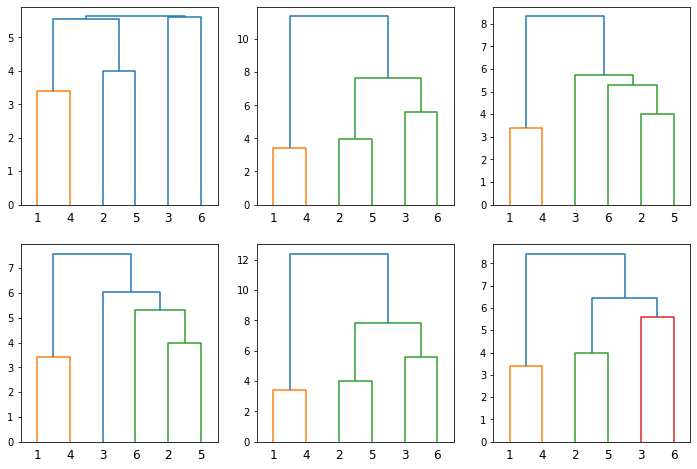

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import scipy.cluster as sc
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析2', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
# print(data.shape)
k = data.shape[1]-2
names = df['编号']
# print(names)
X = df_list[:,3:]
# print(X)
# X = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6,x7,x8]).T,
#                  columns=['x1','x2','x3','x4','x5','x6','x7','x8'],
#                  index = names)
X1 = pd.DataFrame(df_list[:,3:],
                 columns=fields[3:],
                 index = df['编号'].T)
X = np.array(X1,dtype= np.float16)

X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)#注意这里要使用标准差的无偏估计
print(X_std)
# print(X.dtypes)
# 计算距离
dist = dist.pdist(X_std,'cityblock')

print(dist)
# print(dist_std)
# Z = hierarchy.linkage(X_std, 'average')
clustMethods = ['single','complete','median','centroid','ward','average']
ax= plt.subplots(2,3,figsize=(12,8))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
i = 230
for method in clustMethods:
    i = i+1
    plt.subplot(i)
    Z = hierarchy.linkage(dist, method)
    d1 = hierarchy.dendrogram(Z,labels = X1.index,count_sort=False) # ,orientation='right'
plt.show()

[[ 0.45132445  1.13434564  1.18200691 -0.88789053  1.16961059 -0.24240996]
 [ 0.61875126 -0.15937088 -0.45578817  0.92077536 -0.06556587  0.75830808]
 [-0.31301534 -1.33590293 -1.35553319 -1.52092358 -0.21573288 -0.46084531]
 [ 0.74978094  1.13434564  1.15947103  0.41928164  1.18018573  1.52194384]
 [ 0.39672875  0.00703107 -0.0743684   0.92077536 -1.19076087 -1.33369875]
 [-1.89629064 -0.78513593 -0.45578817  0.16442417 -0.8777367  -0.24240996]]
[3.19099932 3.93612429 2.21615419 3.58968448 4.14452361 3.24541779
 2.5858202  2.42178054 2.99167893 4.81677777 3.4092577  2.63552768
 4.11648176 4.55061622 2.80925435]


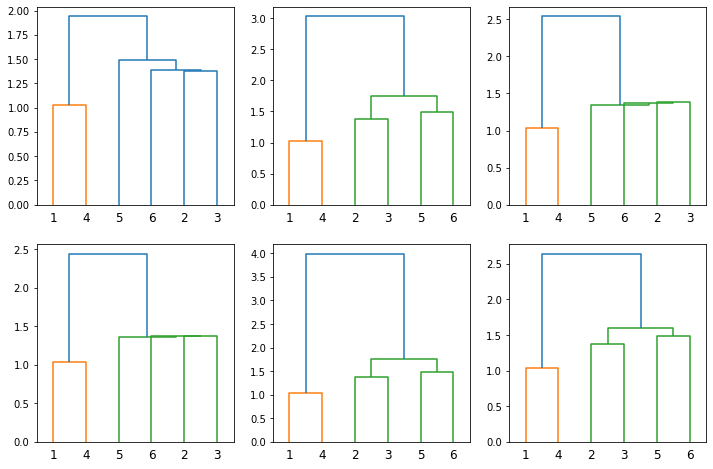

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import scipy.cluster as sc
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析2', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
# print(data.shape)
k = data.shape[1]-2
names = df['编号']
# print(names)
X = df_list[:,3:]
# print(X)
# X = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6,x7,x8]).T,
#                  columns=['x1','x2','x3','x4','x5','x6','x7','x8'],
#                  index = names)
X1 = pd.DataFrame(df_list[:,3:],
                 columns=fields[3:],
                 index = df['编号'].T)
X = np.array(X1,dtype= np.float16)

X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)#注意这里要使用标准差的无偏估计
print(X_std)
# print(X.dtypes)
# 计算距离
dist = dist.pdist(X_std,'euclidean')

print(dist)
# print(dist_std)
# Z = hierarchy.linkage(X_std, 'average')
clustMethods = ['single','complete','median','centroid','ward','average']
ax= plt.subplots(2,3,figsize=(12,8))

i = 230
for method in clustMethods:
    i = i+1
    plt.subplot(i)
    Z = hierarchy.linkage(X, method = method,metric='euclidean')
    d1 = hierarchy.dendrogram(Z,labels = X1.index,count_sort=False) # ,orientation='right'
plt.show()

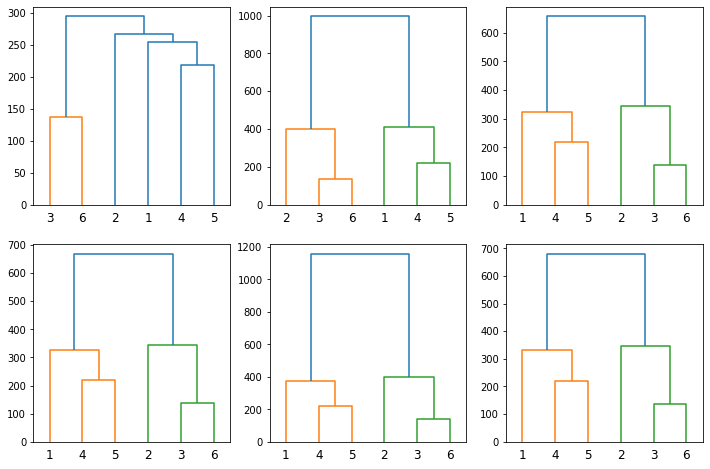

In [35]:
'''
使用各种距离计算方法对数据进行聚类分析。
'''
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import scipy.cluster as sc
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt


ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 
                   268.,400., 754., 564., 138., 219., 869., 669.])
###6种系统聚类法
# method参数为距离定义：

# 　　single : 最短距离法
# 　　complete: 最长距离法
# 　　average: 类平均法， 与通常定义差一个sq, sqrt
# 　　centroid: 重心法
# 　　weighted: 中间距离法
# 　　ward: WARD法
clustMethods = ['single','complete','median','centroid','ward','average']
ax= plt.subplots(2,3,figsize=(12,8))

i = 230
for method in clustMethods:
    i = i+1
    plt.subplot(i)
    Z = hierarchy.linkage(ytdist, method)
    d1 = hierarchy.dendrogram(Z,labels = X1.index,count_sort=False)
plt.show()

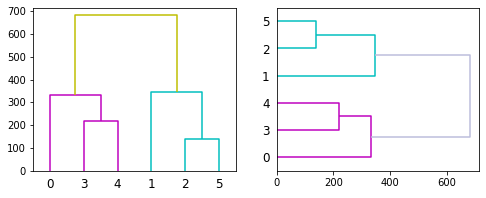

In [36]:
###还可以改变谱系图的轴方向
Z = hierarchy.linkage(ytdist, method)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc',orientation='right')
#hierarchy.set_link_color_palette(None)  # 重置功能
plt.show()

#### 示例：
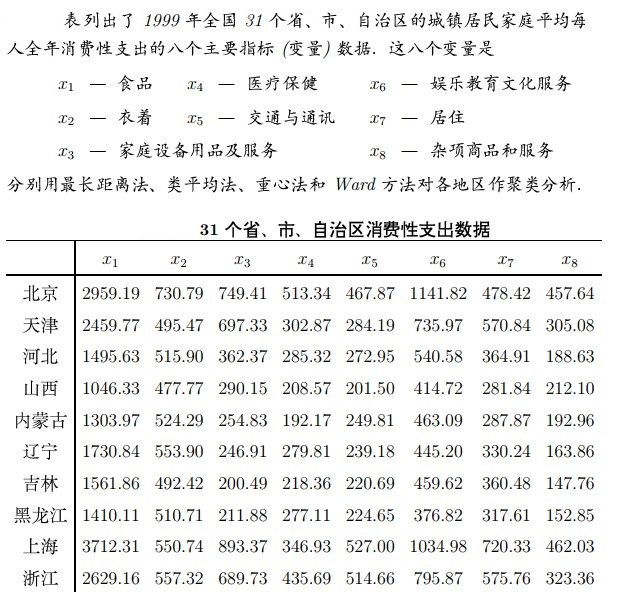
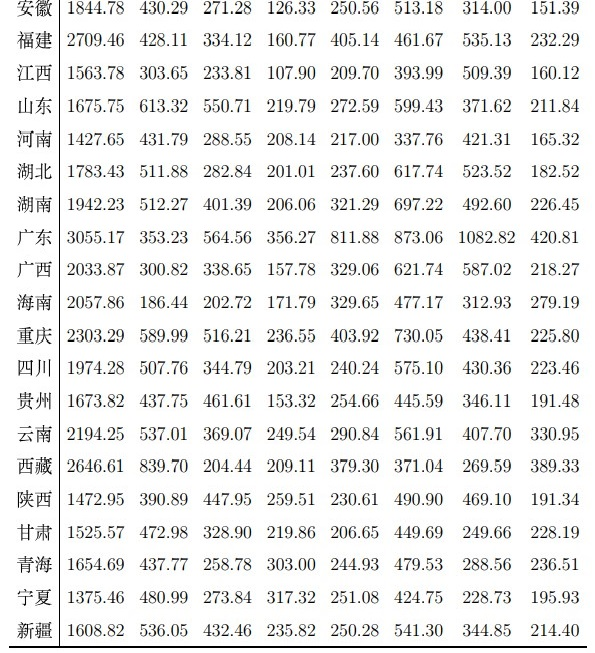

[[5.10e+00 6.00e+00 1.10e+01 6.00e+00 5.10e+01 1.37e+02 1.80e+01 5.60e+01
  3.00e+00 2.80e+01 1.00e+00 2.00e+01]
 [5.40e+00 1.10e+01 1.00e+01 1.40e+01 3.80e+01 1.36e+03 1.30e+01 9.10e+01
  2.00e+00 2.10e+01 1.00e+00 2.60e+01]
 [3.70e+00 3.00e+00 4.00e+00 2.00e+00 1.60e+01 3.40e+01 3.00e+00 2.00e+01
  1.00e+00 8.00e+00 1.00e+00 1.00e+00]
 [1.80e+00 4.00e+00 9.00e+00 4.00e+00 5.30e+01 2.80e+01 5.00e+00 2.90e+01
  1.00e+00 1.30e+01 1.00e+00 3.00e+00]
 [2.80e+00 7.00e+00 1.30e+01 1.00e+01 1.07e+02 1.19e+02 1.70e+01 3.00e+01
  2.00e+00 1.50e+01 3.00e+00 5.00e+00]
 [2.90e+00 7.00e+00 1.20e+01 7.00e+00 3.50e+01 1.05e+02 7.00e+00 6.60e+01
  1.00e+00 3.20e+01 4.00e+00 3.00e+00]
 [1.10e+00 4.00e+00 7.00e+00 6.00e+00 5.50e+01 1.08e+02 6.00e+00 2.60e+01
  1.00e+00 1.10e+01 3.00e+00 4.00e+00]
 [7.00e-01 1.20e+01 1.00e+01 1.20e+01 7.20e+01 2.34e+02 9.00e+00 1.80e+01
  2.00e+00 1.20e+01 1.00e+00 8.00e+00]
 [1.80e+00 7.00e+00 1.30e+01 6.00e+00 6.00e+01 7.70e+01 1.60e+01 1.30e+01
  4.00e+00 7.00e+00 1.

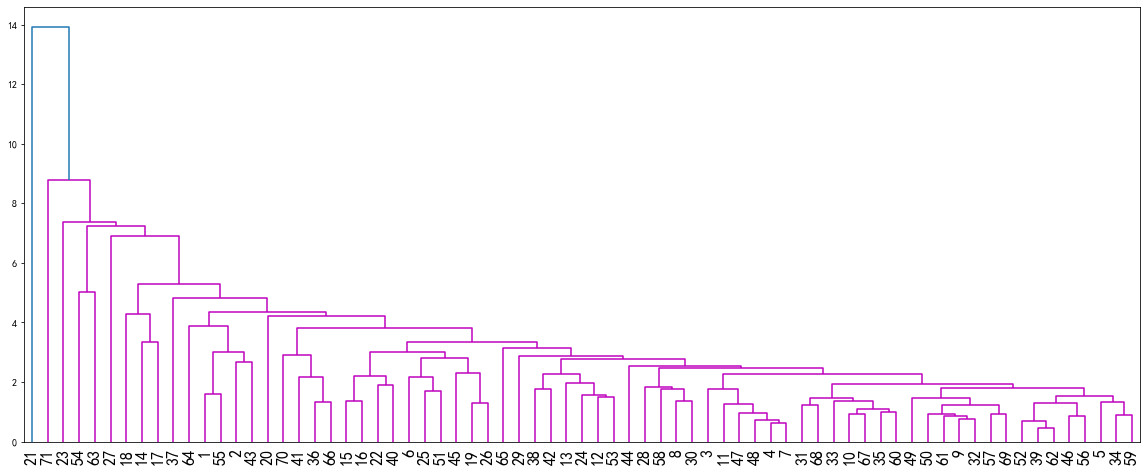

In [37]:
'''
通过8项指标对全国经济数据进行聚类分析。
可与R语言的聚类分析进行对比。
'''
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import scipy.cluster as sc
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
# x1 = np.array([2959.19, 2459.77, 1495.63, 1046.33, 1303.97, 1730.84, 
#         1561.86, 1410.11, 3712.31, 2207.58, 2629.16, 1844.78, 
#         2709.46, 1563.78, 1675.75, 1427.65, 1783.43, 1942.23, 
#         3055.17, 2033.87, 2057.86, 2303.29, 1974.28, 1673.82, 
#         2194.25, 2646.61, 1472.95, 1525.57, 1654.69, 1375.46, 
#         1608.82])
# x2 = np.array([730.79, 495.47, 515.90, 477.77, 524.29, 553.90, 492.42, 
#         510.71, 550.74, 449.37, 557.32, 430.29, 428.11, 303.65, 
#         613.32, 431.79, 511.88, 512.27, 353.23, 300.82, 186.44, 
#         589.99, 507.76, 437.75, 537.01, 839.70, 390.89, 472.98, 
#         437.77, 480.99, 536.05])
# x3 = np.array([749.41, 697.33, 362.37, 290.15, 254.83, 246.91, 200.49, 
#         211.88, 893.37, 572.40, 689.73, 271.28, 334.12, 233.81, 
#         550.71, 288.55, 282.84, 401.39, 564.56, 338.65, 202.72, 
#         516.21, 344.79, 461.61, 369.07, 204.44, 447.95, 328.90, 
#         258.78, 273.84, 432.46])
# x4 = np.array([513.34, 302.87, 285.32, 208.57, 192.17, 279.81, 218.36, 
#         277.11, 346.93, 211.92, 435.69, 126.33, 160.77, 107.90, 
#         219.79, 208.14, 201.01, 206.06, 356.27, 157.78, 171.79, 
#         236.55, 203.21, 153.32, 249.54, 209.11, 259.51, 219.86, 
#         303.00, 317.32, 235.82])
# x5 = np.array([467.87, 284.19, 272.95, 201.50, 249.81, 239.18, 220.69, 
#         224.65, 527.00, 302.09, 514.66, 250.56, 405.14, 209.70, 
#         272.59, 217.00, 237.60, 321.29, 811.88, 329.06, 329.65, 
#         403.92, 240.24, 254.66, 290.84, 379.30, 230.61, 206.65, 
#         244.93, 251.08, 250.28])
# x6 = np.array([1141.82, 735.97, 540.58, 414.72, 463.09, 445.20, 459.62, 
#         376.82, 1034.98, 585.23, 795.87, 513.18, 461.67, 393.99, 
#         599.43, 337.76, 617.74, 697.22, 873.06, 621.74, 477.17, 
#         730.05, 575.10, 445.59, 561.91, 371.04, 490.90, 449.69, 
#         479.53, 424.75, 541.30])
# x7 = np.array([478.42, 570.84, 364.91, 281.84, 287.87, 330.24, 360.48, 
#         317.61, 720.33, 429.77, 575.76, 314.00, 535.13, 509.39, 
#         371.62, 421.31, 523.52, 492.60, 1082.82, 587.02, 312.93, 
#         438.41, 430.36, 346.11, 407.70, 269.59, 469.10, 249.66, 
#         288.56, 228.73, 344.85])
# x8 = np.array([457.64, 305.08, 188.63, 212.10, 192.96, 163.86, 147.76, 
#         152.85, 462.03, 252.54, 323.36, 151.39, 232.29, 160.12, 
#         211.84, 165.32, 182.52, 226.45, 420.81, 218.27, 279.19, 
#         225.80, 223.46, 191.48, 330.95, 389.33, 191.34, 228.19, 
#         236.51, 195.93, 214.40])
# names = np.array(["北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", 
#                    "黑龙江", "上海", "江苏", "浙江", "安徽", "福建", "江西", 
#                    "山东",  "河南", "湖北", "湖南", "广东", "广西", "海南", 
#                    "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", 
#                    "青海", "宁夏", "新疆"])

# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析1', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
# print(data.shape)
k = data.shape[1]-2
names = df['编号']
# print(names)
X = df_list[:,3:]
# print(X)
# X = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6,x7,x8]).T,
#                  columns=['x1','x2','x3','x4','x5','x6','x7','x8'],
#                  index = names)
X1 = pd.DataFrame(df_list[:,3:],
                 columns=fields[3:],
                 index = df['编号'].T)
X = np.array(X1,dtype= np.float16)
print(X)
X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)#注意这里要使用标准差的无偏估计
print(X_std)
# print(X.dtypes)
# 计算距离
dist = dist.pdist(X_std,'euclidean')

print(dist)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(20,8))
Z = hierarchy.linkage(dist, 'average')
###绘制系统树图
#dendrogram：系统树图
d1 = hierarchy.dendrogram(Z,labels = X1.index,count_sort=False)
plt.xticks(size=16)
plt.show()

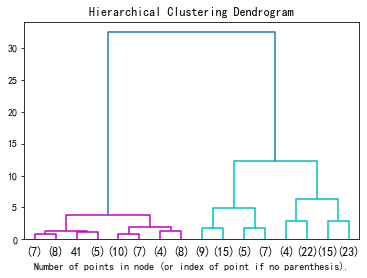

In [38]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

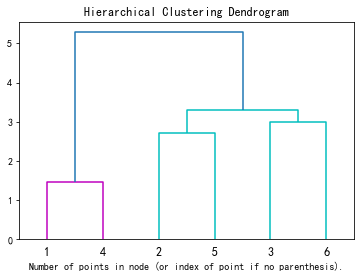

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data
# 利用pandas读取Excel    
df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析2', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
# print(data.shape)
k = data.shape[1]-2
names = df['编号']
# print(names)
X = df_list[:,3:]
# print(X)
# X = pd.DataFrame(np.array([x1,x2,x3,x4,x5,x6,x7,x8]).T,
#                  columns=['x1','x2','x3','x4','x5','x6','x7','x8'],
#                  index = names)
X1 = pd.DataFrame(df_list[:,3:],
                 columns=fields[3:],
                 index = df['编号'].T)
X = np.array(X1,dtype= np.float16)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,compute_distances=True,linkage='average',affinity='manhattan')
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
# affinitystr or callable, default=’euclidean’

#     Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 
# If linkage is “ward”, only “euclidean” is accepted. 
# If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3, labels = X1.index)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 6.2.3 Kmeans方法--动态聚类法
- #### 概念
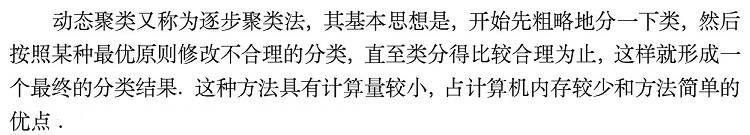

[[ 1.97229227  1.86276928]
 [ 0.00238681 -0.05379167]]
0.28513994540863374


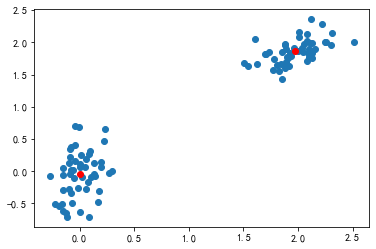

In [40]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
# Create 50 datapoints in two clusters a and b
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
# print(a)
# print(b)
features = np.concatenate((a, b))
# print(features)
# Whiten data
whitened = whiten(features)
# print(whitened)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
print(codebook)
print(distortion)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

[[0.13439929 1.28651178 1.13784457 1.28012328 2.34319314 0.20621364
  0.66703183 1.11111801 1.65467813 1.12218163 0.3514199  0.43769611]
 [0.76008051 2.32531012 2.20531791 2.64020527 2.32199485 0.99863295
  1.82874126 2.54380284 1.77266387 2.57958836 0.91436639 1.28763822]]
2.5310924680399682


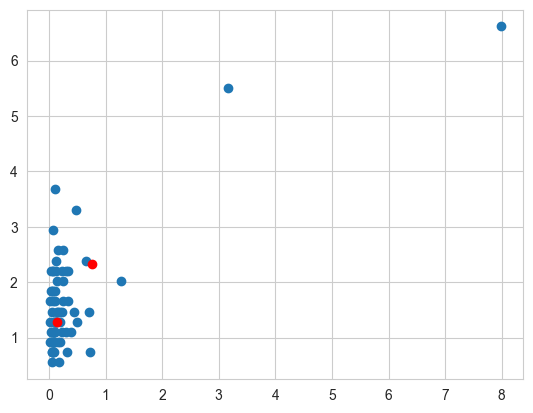

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析1', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
features = data[:,3:].astype('float') #np.concatenate((a, b))
# print(features)
# Whiten data
whitened = whiten(features)
# print(whitened)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
print(codebook)
print(distortion)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

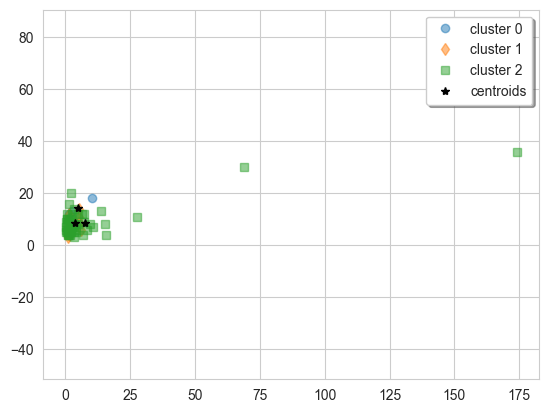

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析1', header= 0)
# print(df)
fields = df.columns.values
# print(fields)
df_list = df.values
data =np.matrix(df_list)
features = data[:,3:].astype('float') #np.concatenate((a, b))
# print(features)
# Whiten data
whitened = whiten(features)
# print(whitened)
# Find 2 clusters in the data
centroid, label = kmeans2(features, 3, minit='points')
counts = np.bincount(label)
w0 = features[label == 0]
w1 = features[label == 1]
w2 = features[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()

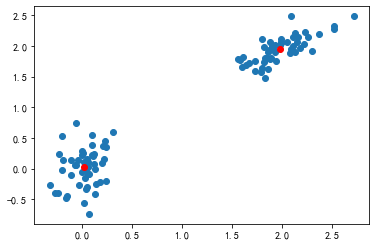

In [43]:
'''
kmeans算法，通过模拟生成数据进行聚类。
'''
from numpy import array
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
from numpy import random
pts=50
###[0, 0]均值，[[4, 1], [1, 4]]协方差
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],[[10, 2], [2, 1]],size=pts)
# print(a)
# print(b)
# print('-------------------------')
features = np.concatenate((a, b))
# print(features)
###whiten是归一化函数
whitened = whiten(features)
codebook, distortion = kmeans(whitened, 2)
###数据归一化后的散点图
plt.scatter(whitened[:, 0], whitened[:, 1])
###codebook是每个聚类的质心
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

## 聚类分析案例
https://blog.csdn.net/TSzero/article/details/116265151?spm=1001.2101.3001.6650.6&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-6-116265151-blog-110976037.pc_relevant_blogantidownloadv1&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-6-116265151-blog-110976037.pc_relevant_blogantidownloadv1&utm_relevant_index=10


In [6]:
# 1.导入要用到的库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 2.导入数据源
df = pd.read_excel(r'.\data.xlsx',sheet_name= '聚类分析1', header= 0)
print(df)
# df.info() #查看数据信息
# df.dtypes 查看各数据的数据类型


    编号    East   North     U  Pb  Ni  Co   Zn    Mn  Cu   V  Mo  Cr  Th   Ag
0    1  595.80  466.85   5.1   6  11   6   51   137  18  56   3  28    1  20
1    2  598.45  460.40   5.4  11  10  14   38  1360  13  91   2  21    1  26
2    3  600.95  476.33   3.7   3   4   2   16    34   3  20   1   8    1   1
3    4  603.62  480.33   1.8   4   9   4   53    28   5  29   1  13    1   3
4    5  600.65  480.33   2.8   7  13  10  107   119  17  30   2  15    3   5
..  ..     ...     ...   ...  ..  ..  ..  ...   ...  ..  ..  ..  ..  ...  ..
66  67  576.55  464.77   1.4   9  12   9   54   141  11  31   6  12    1   2
67  68  576.75  467.15   2.3  10  12   8   84    77  11  16   5   8    1   4
68  69  574.15  467.23   4.2   5  10   6   72   215  18  14   3   8    1   6
69  70  577.58  461.17  14.1  13  21  13   75   231  28  36   9  17    1   5
70  71  585.90  469.90  69.0  30  33  16   83   199  37  28   3  26    2  54

[71 rows x 15 columns]


In [8]:
# 3.选取要聚类的列
X = df[['U','Pb']]

In [9]:
# 4.将数据进行标准化
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_scale = s.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns, index=X.index)
X_scale.head()

,U,Pb
0,-0.103014,-0.520300
1,-0.089245,0.398637
2,-0.167269,-1.071662
3,-0.254472,-0.887874
4,-0.208575,-0.336512


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

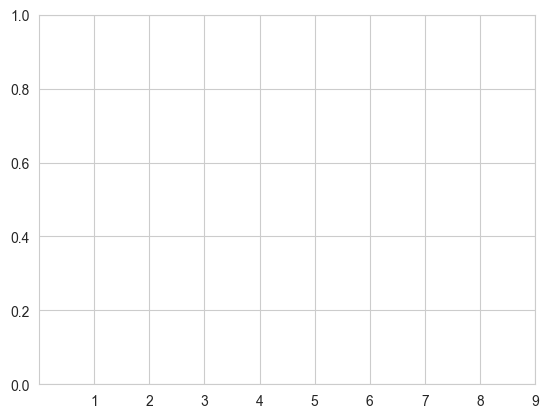

In [10]:
# 5.利用“肘”方法找出最佳聚类个数
from sklearn.cluster import KMeans
# 定义候选的K值。
scope = range(1, 10)
# 定义SSE列表，用来存放不同K值下的SSE。
sse = []
for k in scope:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scale)
    sse.append(kmeans.inertia_)
plt.xticks(scope)
sns.lineplot(scope, sse, marker="o")

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scale)
# 获取每个样本所属的簇。标签的数值对应所属簇的索引。
print("标签：", kmeans.labels_)

In [ ]:
df['kmeans.labels_']=kmeans.labels_
df

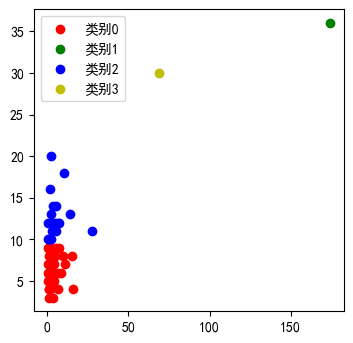

In [51]:
fig =plt.figure(figsize=(4,4), dpi=100)
color = ["r", "g", "b",'y']
for i in range(4):
    d = df[kmeans.labels_ == i]
    plt.scatter(d.U, d.Pb,color=color[i], label=f"类别{i}")
    plt.legend()
    plt.rcParams['font.family']='SimHei'
    plt.rcParams['axes.unicode_minus']='False'

In [52]:
codebook

array([[0.01953367, 0.02253646],
       [1.97795483, 1.94692289]])

------------

[1 1 0 ... 2 2 2]


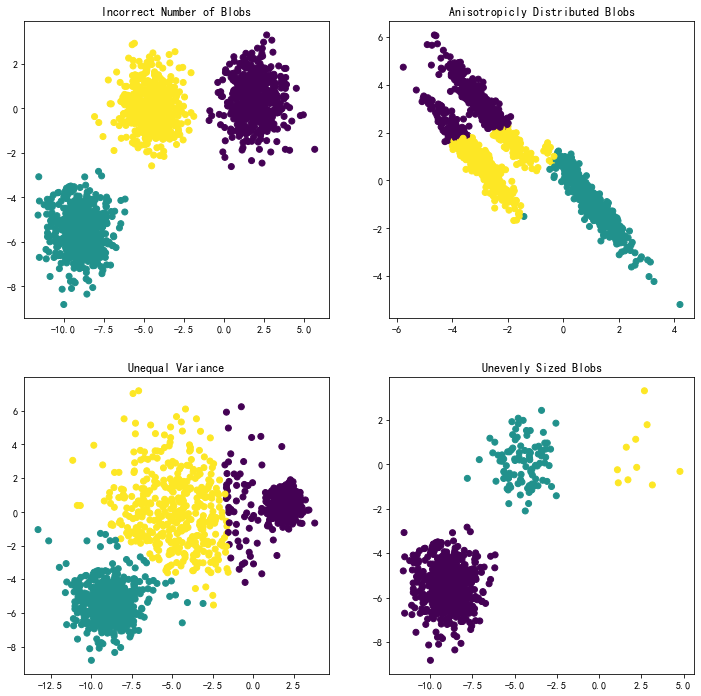

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# print(X)
print(y)
# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

[1 1 0 ... 2 2 2]


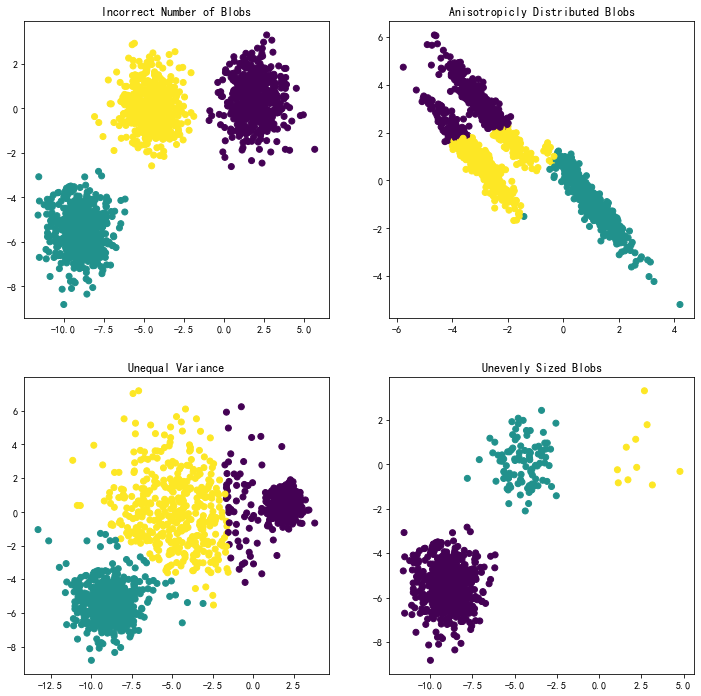

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# print(X)
print(y)
# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [55]:
'''
Author: Vici__
date: 2020/5/14
'''
import math
 
'''
Point类，记录坐标x，y和点的名字id
'''
class Point:
    '''
    初始化函数
    '''
    def __init__(self, x, y, name):
        self.x = x # 横坐标
        self.y = y # 纵坐标
        self.name = name # 名字 
    '''
    计算两点之间的欧几里得距离
    '''
    def calc_Euclidean_distance(self, p2):
        return math.sqrt((self.x - p2.x) * (self.x - p2.x) + (self.y - p2.y) * (self.y - p2.y))
 
'''
1. 获取数据集
'''
def get_dataset():
    # 原始数据集以元组形式存放，(横坐标，纵坐标，名字)
    datas = [(1, 3, '1'), (1, 2, '2'), (2, 4, '3'), (2, 3, '4'), 
                (2, 2, '5'), (2, 1, '6'), (3, 2, '7'), (4, 2, '8'), 
                (5, 3, '9'), (5, 2, '10'), (5, 1, '11'), (6, 2, '12')]
    dataset = [] # 用于计算两点之间的距离，形式 [point1, point2...]
    id_point_dict = {} # 编号和点的映射
    temp_list = []
    for i in range(len(datas)): # 遍历原始数据集
        point = Point(datas[i][0], datas[i][1], datas[i][2]) # 利用(横坐标，纵坐标，编号)实例化
        id_point_dict[str(i)] = point
        dataset.append(point) # 放入dataset中
        temp_list.append(point)
    return dataset, id_point_dict # [p1, p2], {id: point}
 
'''
2. 计算任意两点之间的距离
'''
def get_dist(dataset):
    n = len(dataset) # 点的个数
    dist = [] # 存放任意两点之间的距离
    for i in range(n):
        dist_i = [] # 临时列表
        for j in range(n): # 遍历数据集
            # 计算距离并放入临时列表中
            dist_i.append(dataset[i].calc_Euclidean_distance(dataset[j]))
        dist.append(dist_i) # 利用临时列表创建二维列表
    # 打印dist
    print("任意两点之间的距离：")
    for d in dist:
        print(d)
    print()
    return dist
 
def DBSCAN(dataset, r, min_point):
    id_to_key = {} # 编号到key的映射
    key_to_set = {} # key到集合的映射
    key_num = len(dataset) # 当形成新的集合时，需要新的key值
    dist = get_dist(dataset) # 获取任意两点之间的距离
    for i in range(len(dataset)): # 遍历数据集
        id_to_key[i] = str(i) # 编号到key的映射，编号就是下标，key值就是下标的字符串形式
        key_to_set[str(i)] = set() # 集合
        key_to_set[str(i)].add(dataset[i].name) # 集合内存放该数据点的名字
    for i in range(len(dataset)):
        count = 0 # 计数，符合条件的数据点的个数
        t_list = []
        for j in range(len(dataset)): # 寻找小于半径的数据点
            if dist[i][j] <= r:
                count += 1 # 计数加一
                t_list.append(j) # 放入临时列表中
        
        if count >= min_point: # 如果数据点个数大于等于要求的点数
            union_set = set() # 定义新集合
            key_ = str(key_num) # 新集合需要映射的key值
            for id in t_list:
                key = id_to_key[id] # 上面找到的数据点，根据下标获取key值
                if key not in key_to_set: # 如果集合中有多个数据点时，第一个数据点时可能就删除了，这个key值就没了
                    continue
                s = key_to_set[key] # 根据key值找到相应集合
                union_set = union_set.union(s) # 合并到新集合中
                id_to_key[id] = key_ # 数据点下标映射到新key值
                del key_to_set[key] # 删除旧集合
            key_to_set[key_] = union_set # 新key值到新集合的映射
            key_num += 1 # 更新key_num
        # 每次输出一下结果
        for v in key_to_set.values():
            print(v)
        print("-----------------------------------")
# 测试
dataset, id_point_dict = get_dataset()
r = 1
min_point = 4
DBSCAN(dataset, r, min_point)

任意两点之间的距离：
[0.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951, 2.23606797749979, 2.23606797749979, 3.1622776601683795, 4.0, 4.123105625617661, 4.47213595499958, 5.0990195135927845]
[1.0, 0.0, 2.23606797749979, 1.4142135623730951, 1.0, 1.4142135623730951, 2.0, 3.0, 4.123105625617661, 4.0, 4.123105625617661, 5.0]
[1.4142135623730951, 2.23606797749979, 0.0, 1.0, 2.0, 3.0, 2.23606797749979, 2.8284271247461903, 3.1622776601683795, 3.605551275463989, 4.242640687119285, 4.47213595499958]
[1.0, 1.4142135623730951, 1.0, 0.0, 1.0, 2.0, 1.4142135623730951, 2.23606797749979, 3.0, 3.1622776601683795, 3.605551275463989, 4.123105625617661]
[1.4142135623730951, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 3.1622776601683795, 3.0, 3.1622776601683795, 4.0]
[2.23606797749979, 1.4142135623730951, 3.0, 2.0, 1.0, 0.0, 1.4142135623730951, 2.23606797749979, 3.605551275463989, 3.1622776601683795, 3.0, 4.123105625617661]
[2.23606797749979, 2.0, 2.23606797749979, 1.4142135623730951, 1.0, 1.4142135623730951, 0.0, 1.0, 

       eps  min_samples  n_clusters  outlines       stats
40   0.251            2           3        23     [3 3 2]
57   0.351            3           3        19     [6 3 3]
88   0.551            2           3         7  [17  5  2]
96   0.601            2           3         7  [17  5  2]
104  0.651            2           3         5  [17  7  2]
112  0.701            2           3         5  [17  7  2]
129  0.801            3           3         4  [17  7  3]
136  0.851            2           3         2  [24  3  2]
144  0.901            2           3         1  [24  4  2]
152  0.951            2           3         1  [24  4  2]


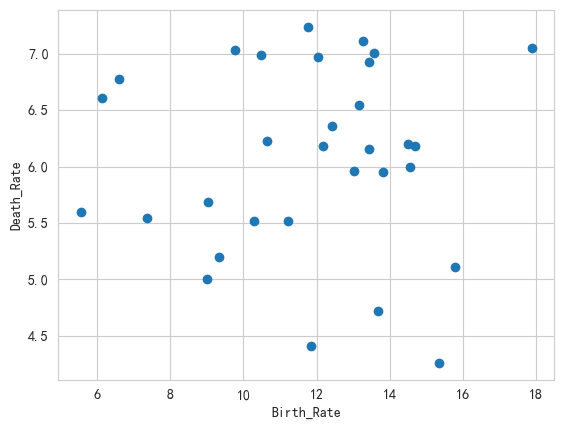

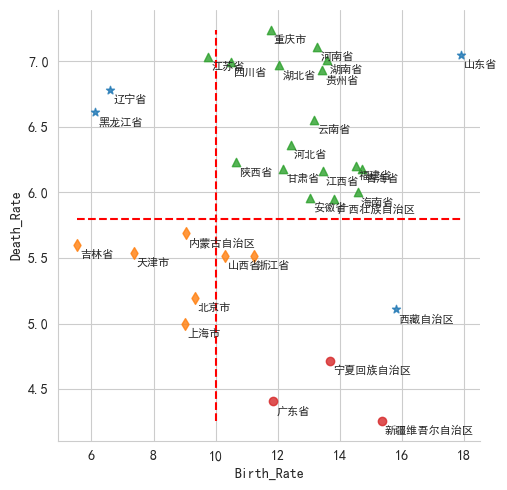

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing  # 用于变量的标准化处理
from sklearn import cluster
import numpy as np
import seaborn as sns  # 用于绘制聚类的效果散点图


# 用于DataFrame显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 用于最后输出的图形汉字显示正常
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 读取外部数据
Province = pd.read_excel('./Province.xlsx')
Province.head()  # 显示表格的前五行
# 绘制出生率与死亡率散点图
plt.scatter(Province.Birth_Rate, Province.Death_Rate)  # Birth_Rate作为x Death_Rate作为y
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
# plt.show()


# 选取建模的变量
predictors = ['Birth_Rate', 'Death_Rate']
# 变量的标准化处理
X = preprocessing.scale(Province[predictors])
X = pd.DataFrame(X)

# 构建空列表，用于保存不同参数组合下的结果
res = []
# 迭代不同的eps值
for eps in np.arange(0.001, 1, 0.05):
    # 迭代不同的min_samples值
    for min_samples in range(2, 10):
        dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        # 模型拟合
        dbscan.fit(X)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])  # set函数用来创造一个无序不重复元素集合
        # 异常点的个数
        outlines = np.sum(np.where(dbscan.labels_ == -1, 1, 0))
        # 统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'outlines': outlines, 'stats': stats})

# 将迭代后的结果存储到数据框中
df = pd.DataFrame(res)
# 根据条件筛选合理的参数组合
print(df.loc[df.n_clusters == 3, :])


# 利用上述的参数组合值，重建密度聚类算法
dbscan = cluster.DBSCAN(eps=0.801, min_samples=3)
# 模型拟合
dbscan.fit(X)
Province['dbscan_label'] = dbscan.labels_
# 绘制聚类的效果散点图  hue用于分类
sns.lmplot(x='Birth_Rate', y='Death_Rate', hue='dbscan_label', data=Province,
           markers=['*', 'd', '^', 'o'], fit_reg=False, legend=False)
# 添加省份标签
for x, y, text in zip(Province.Birth_Rate, Province.Death_Rate, Province.Province):
    plt.text(x+0.1, y-0.1, text, size=8)
# 添加参考线
plt.hlines(y=5.8, xmin=Province.Birth_Rate.min(), xmax=Province.Birth_Rate.max(),
           linestyles='--', colors='red')
plt.vlines(x=10, ymin=Province.Death_Rate.min(), ymax=Province.Death_Rate.max(),
           linestyles='--', colors='red')
# 添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')
# 显示图形
plt.show()